In [6]:
import os
from pathlib import Path
import glob
import pandas as pd
from ase.io import read

In [9]:
EXPERIMENT = "../CCGAN/results/3-with-dist-high-weight-limit-data-fixed-golden"
experiment_name = EXPERIMENT.split("/")[-1]+"/" # Get the experiment name from the path

N_STRUC = 50

In [11]:
# Generate samples for all different phi values
phis = [
    "0.86",
    "0.85",
    "0.84",
    "0.83",
    "0.82",
    "0.80",
    "0.78",
    "0.76",
    "0.74",
    "0.72",
    "0.70",
]


# Pick a generator, NOTE: Using the highest epoch generator
generator_list = glob.glob(f"{EXPERIMENT}/generator_*")
generator_list = sorted(generator_list, key=lambda x: int(x.split("_")[-1].split(".")[0]))
generator_path = generator_list[-1] # Get the last generator in the list

# Alternatively, you can specify a specific generator
# generator_path = f"{EXPERIMENT}/generator_1000.pth"

# Check if the generator path exists
if not Path(generator_path).exists():
    raise FileNotFoundError(f"Generator path {generator_path} does not exist.")
# Check if the generator path is a file
if not Path(generator_path).is_file():
    raise FileNotFoundError(f"Generator path {generator_path} is not a file.")

command = lambda phi: f"""
    cd .. && cd CCGAN && python generate_structures.py \
    --load_generator {generator_path} \
    --n_struc {N_STRUC} \
    --ref_struc ../data/processed/samples/phi-{phi}/samples.extxyz \
    --n_labels 2 \
    --gen_channels_1 256 \
    --latent_dim 256 \
    --gen_label_dim 128 \
    --write_fname ../data/gen-extxyz/{experiment_name} \
"""


for phi in phis:
    os.system(command(phi))

Loading generator...
=> Loaded '../CCGAN/results/3-with-dist-high-weight-limit-data-fixed-golden/generator_780'.


100%|██████████| 50/50 [00:00<00:00, 1054.78it/s]


Writing generated structures to file...
File name:  ../data/gen-extxyz/3-with-dist-high-weight-limit-data-fixed-golden/phi-0.86.extxyz
Loading generator...
=> Loaded '../CCGAN/results/3-with-dist-high-weight-limit-data-fixed-golden/generator_780'.


100%|██████████| 50/50 [00:00<00:00, 2345.47it/s]


Writing generated structures to file...
File name:  ../data/gen-extxyz/3-with-dist-high-weight-limit-data-fixed-golden/phi-0.85.extxyz
Loading generator...
=> Loaded '../CCGAN/results/3-with-dist-high-weight-limit-data-fixed-golden/generator_780'.


100%|██████████| 50/50 [00:00<00:00, 907.59it/s]


Writing generated structures to file...
File name:  ../data/gen-extxyz/3-with-dist-high-weight-limit-data-fixed-golden/phi-0.84.extxyz
Loading generator...
=> Loaded '../CCGAN/results/3-with-dist-high-weight-limit-data-fixed-golden/generator_780'.


100%|██████████| 50/50 [00:00<00:00, 662.45it/s]


Writing generated structures to file...
File name:  ../data/gen-extxyz/3-with-dist-high-weight-limit-data-fixed-golden/phi-0.83.extxyz
Loading generator...
=> Loaded '../CCGAN/results/3-with-dist-high-weight-limit-data-fixed-golden/generator_780'.


100%|██████████| 50/50 [00:00<00:00, 1003.05it/s]


Writing generated structures to file...
File name:  ../data/gen-extxyz/3-with-dist-high-weight-limit-data-fixed-golden/phi-0.82.extxyz
Loading generator...
=> Loaded '../CCGAN/results/3-with-dist-high-weight-limit-data-fixed-golden/generator_780'.


100%|██████████| 50/50 [00:00<00:00, 805.45it/s]


Writing generated structures to file...
File name:  ../data/gen-extxyz/3-with-dist-high-weight-limit-data-fixed-golden/phi-0.8.extxyz
Loading generator...
=> Loaded '../CCGAN/results/3-with-dist-high-weight-limit-data-fixed-golden/generator_780'.


100%|██████████| 50/50 [00:00<00:00, 900.27it/s]


Writing generated structures to file...
File name:  ../data/gen-extxyz/3-with-dist-high-weight-limit-data-fixed-golden/phi-0.78.extxyz
Loading generator...
=> Loaded '../CCGAN/results/3-with-dist-high-weight-limit-data-fixed-golden/generator_780'.


100%|██████████| 50/50 [00:00<00:00, 860.88it/s]


Writing generated structures to file...
File name:  ../data/gen-extxyz/3-with-dist-high-weight-limit-data-fixed-golden/phi-0.76.extxyz
Loading generator...
=> Loaded '../CCGAN/results/3-with-dist-high-weight-limit-data-fixed-golden/generator_780'.


100%|██████████| 50/50 [00:00<00:00, 1493.29it/s]


Writing generated structures to file...
File name:  ../data/gen-extxyz/3-with-dist-high-weight-limit-data-fixed-golden/phi-0.74.extxyz
Loading generator...
=> Loaded '../CCGAN/results/3-with-dist-high-weight-limit-data-fixed-golden/generator_780'.


100%|██████████| 50/50 [00:00<00:00, 616.70it/s]


Writing generated structures to file...
File name:  ../data/gen-extxyz/3-with-dist-high-weight-limit-data-fixed-golden/phi-0.72.extxyz
Loading generator...
=> Loaded '../CCGAN/results/3-with-dist-high-weight-limit-data-fixed-golden/generator_780'.


100%|██████████| 50/50 [00:00<00:00, 519.01it/s]


Writing generated structures to file...
File name:  ../data/gen-extxyz/3-with-dist-high-weight-limit-data-fixed-golden/phi-0.7.extxyz


In [12]:
# Save the coordinates to a CSV file

import os
# os.mkdir("../data/gen")
# os.mkdir("../data/gen/phi-0.84")

from pathlib import Path

files = glob.glob(f"../data/gen-extxyz/{experiment_name}/phi-*.extxyz")

for file in files:
    print(file)
    phi = file.split("phi-")[-1].split(".")[1]
    # output_file = output_file.split("-")[1]
    output_folder= Path(f"../data/gen/{experiment_name}/phi-0.{phi}")
    output_folder.mkdir(parents=True, exist_ok=True)
    all_atoms = read(file, index=":", format="extxyz")
    
    for i, atoms in enumerate(all_atoms):

        output_file = f"{output_folder}/sample-{i}"
        
        with open(output_file, "w+") as f:
            
            L = atoms.info["L"]
            N = atoms.info["N"]

            header = "\t{N}\t{L}\t1626.81570886301\t\n".format(N=N, L=L)
            f.write(header)

            _df = pd.DataFrame({
                "class": atoms.get_atomic_numbers(),
                "x": atoms.get_positions()[:,0],
                "y": atoms.get_positions()[:,1],
            }).to_csv(f, index=False, header=False, sep="\t")

../data/gen-extxyz/3-with-dist-high-weight-limit-data-fixed-golden/phi-0.85.extxyz
../data/gen-extxyz/3-with-dist-high-weight-limit-data-fixed-golden/phi-0.76.extxyz
../data/gen-extxyz/3-with-dist-high-weight-limit-data-fixed-golden/phi-0.74.extxyz
../data/gen-extxyz/3-with-dist-high-weight-limit-data-fixed-golden/phi-0.78.extxyz
../data/gen-extxyz/3-with-dist-high-weight-limit-data-fixed-golden/phi-0.8.extxyz
../data/gen-extxyz/3-with-dist-high-weight-limit-data-fixed-golden/phi-0.83.extxyz
../data/gen-extxyz/3-with-dist-high-weight-limit-data-fixed-golden/phi-0.72.extxyz
../data/gen-extxyz/3-with-dist-high-weight-limit-data-fixed-golden/phi-0.84.extxyz
../data/gen-extxyz/3-with-dist-high-weight-limit-data-fixed-golden/phi-0.86.extxyz
../data/gen-extxyz/3-with-dist-high-weight-limit-data-fixed-golden/phi-0.82.extxyz
../data/gen-extxyz/3-with-dist-high-weight-limit-data-fixed-golden/phi-0.7.extxyz


## Save to the original data format

In [15]:
# Save the coordinates to a CSV file

from pathlib import Path

files = glob.glob(f"../data/gen-extxyz/{experiment_name}/phi-*.extxyz")

for file in files:
    output_folder = file.split("phi-")[-1].split(".")[1]
    # output_file = output_file.split("-")[1]
    output_folder= Path(f"../data/gen/{experiment_name}/phi-0.{output_folder}")
    output_folder.mkdir(parents=True, exist_ok=True)
    all_atoms = read(file, index=":", format="extxyz")
    
    for i, atoms in enumerate(all_atoms):

        output_file = f"{output_folder}/sample-{i}"
        
        with open(output_file, "w+") as f:
            
            L = atoms.info["L"]
            N = atoms.info["N"]

            header = "\t{N}\t{L}\t1626.81570886301\t\n".format(N=N, L=L)
            f.write(header)
            f.write("\n") # Extra line for spacing

            _df = pd.DataFrame({
                "class": atoms.get_atomic_numbers(),
                "x": atoms.get_positions()[:,0]-L/2,
                "y": atoms.get_positions()[:,1]-L/2,
                "r": atoms.get_array("rmt")
            }).to_csv(f, index=False, header=False, sep="\t")


## Optional: Visualize generated samples

Reading file:  ../data/gen-extxyz/3-with-dist-high-weight-limit-data-fixed-golden//phi-0.86.extxyz


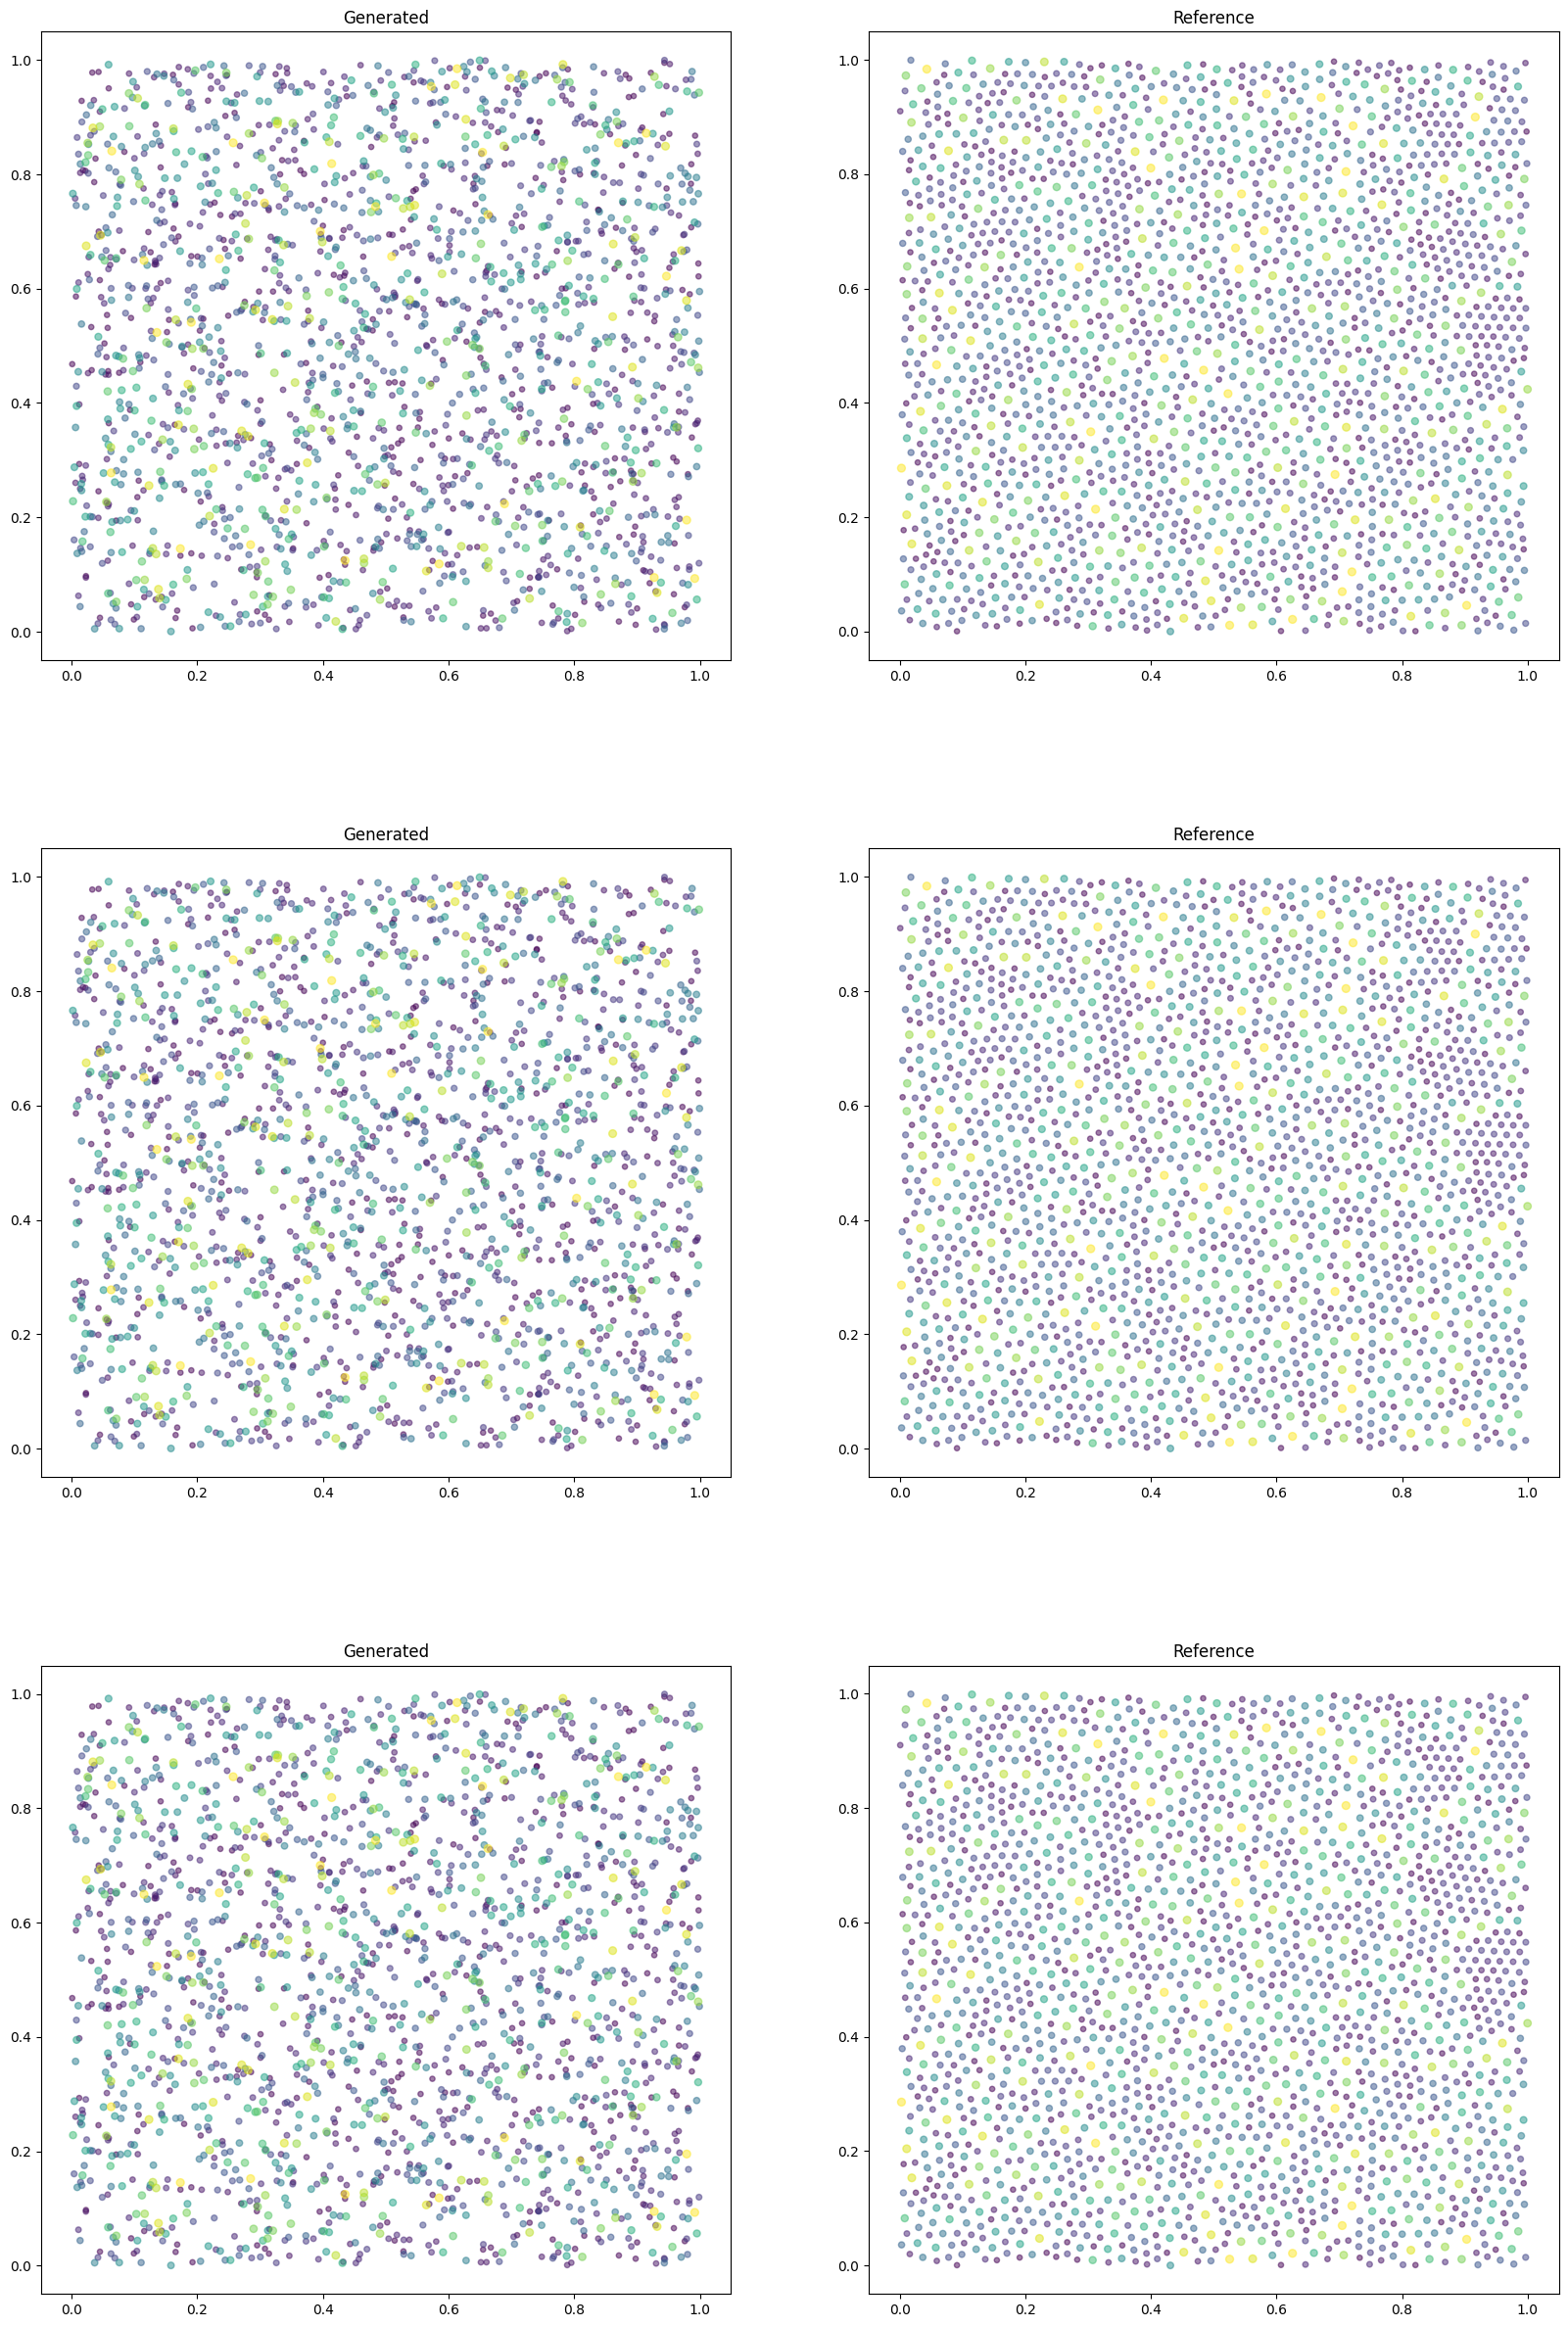

In [16]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

PHI = "0.86"

padded_phi = format(float(PHI), ".2f")

ref_struct = read(f"../data/processed/samples/phi-{padded_phi}/samples.extxyz", index=1, format="extxyz")
file = f"../data/gen-extxyz/{experiment_name}/phi-{PHI}.extxyz"


print("Reading file: ", file)

all_atoms = read(file, index=":", format="extxyz")
idxs = [0,5,19]

fig = plt.figure(figsize=(20, 10*len(idxs)))
gs  = gridspec.GridSpec(len(idxs), 2, hspace=0.3)

# top row: two scatter plots

for i, idx in enumerate(idxs):
    np_coords = all_atoms[idx].get_scaled_positions()
    # — Top: generated vs reference scatter plots —
    ax_gen = fig.add_subplot(gs[i, 0])
    ax_ref = fig.add_subplot(gs[i, 1])
    radii = atoms.get_array("rmt")
    ax_gen.scatter(
        atoms.get_scaled_positions()[:,0],
        atoms.get_scaled_positions()[:,1],
        c=radii, s=radii*20, alpha=0.5
    )
    ax_gen.set_title("Generated")
    
    radii_ref = ref_struct.get_array("rmt")
    ax_ref.scatter(
        ref_struct.get_scaled_positions()[:,0],
        ref_struct.get_scaled_positions()[:,1],
        c=radii_ref, s=radii_ref*20, alpha=0.5
    )
    ax_ref.set_title("Reference")

## Optional: Load the generator to directly generate samples and discriminator to test realness

In [ ]:
import torch

# Load the generator
phi = "0.86"

%cd ..
from CCGAN.models import Generator
%cd -

class Args:
    def __init__(self, **kwargs):
        self.__dict__.update(kwargs)

args = Args(
    load_generator=generator_path,
    n_struc=N_STRUC,
    ref_struc=f"../data/processed/samples/phi-{phi}/samples.extxyz",
    gen_channels_1=256,
    latent_dim=256,
    gen_label_dim=128,
    n_labels=1,
    label_phis=float(phi),
    write_fname=f"../data/gen-extxyz/{experiment_name}",
)

gen = Generator(args, n_atoms_total=2000, n_label_features=2, label_dim=128)

gen.load_state_dict(torch.load(generator_path,map_location=torch.device('cpu')))

gen.eval()